Введение:

Данный проект — это выполнение кейса от компании «Самолет». В первом интенсиве задача заключается в том, чтобы собрать данные и обработать эти данные.

Первая часть сбора данных расположена на GitHub по ссылке: https://github.com/Sr123Saha/1intensive1 в файле main в папке parser.ipynb.

Используемые данные также расположены в этом репозитории в папке main в файле dataframe.csv.

Импортируем необходимые данные

In [1082]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

Берём данные из папки и проверяем, правильно ли мы указали их, выводя наглядный пример наших данных.

In [1083]:
df = pd.read_csv("dataframe.csv")
df.head(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо


Далее убираем мало влияющие данные на нашу задачу, тем самым уменьшая количество данных в строках.
Также выводим оставшееся количество строк и столбцов.

In [1084]:
df.drop(columns=['author','heating_type', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number','heating_type','residential_complex'], inplace=True)
df.shape

(7970, 18)

Выводим заполненность наших данных и их недостатки в виде пропусков.

<Figure size 1000x600 with 0 Axes>

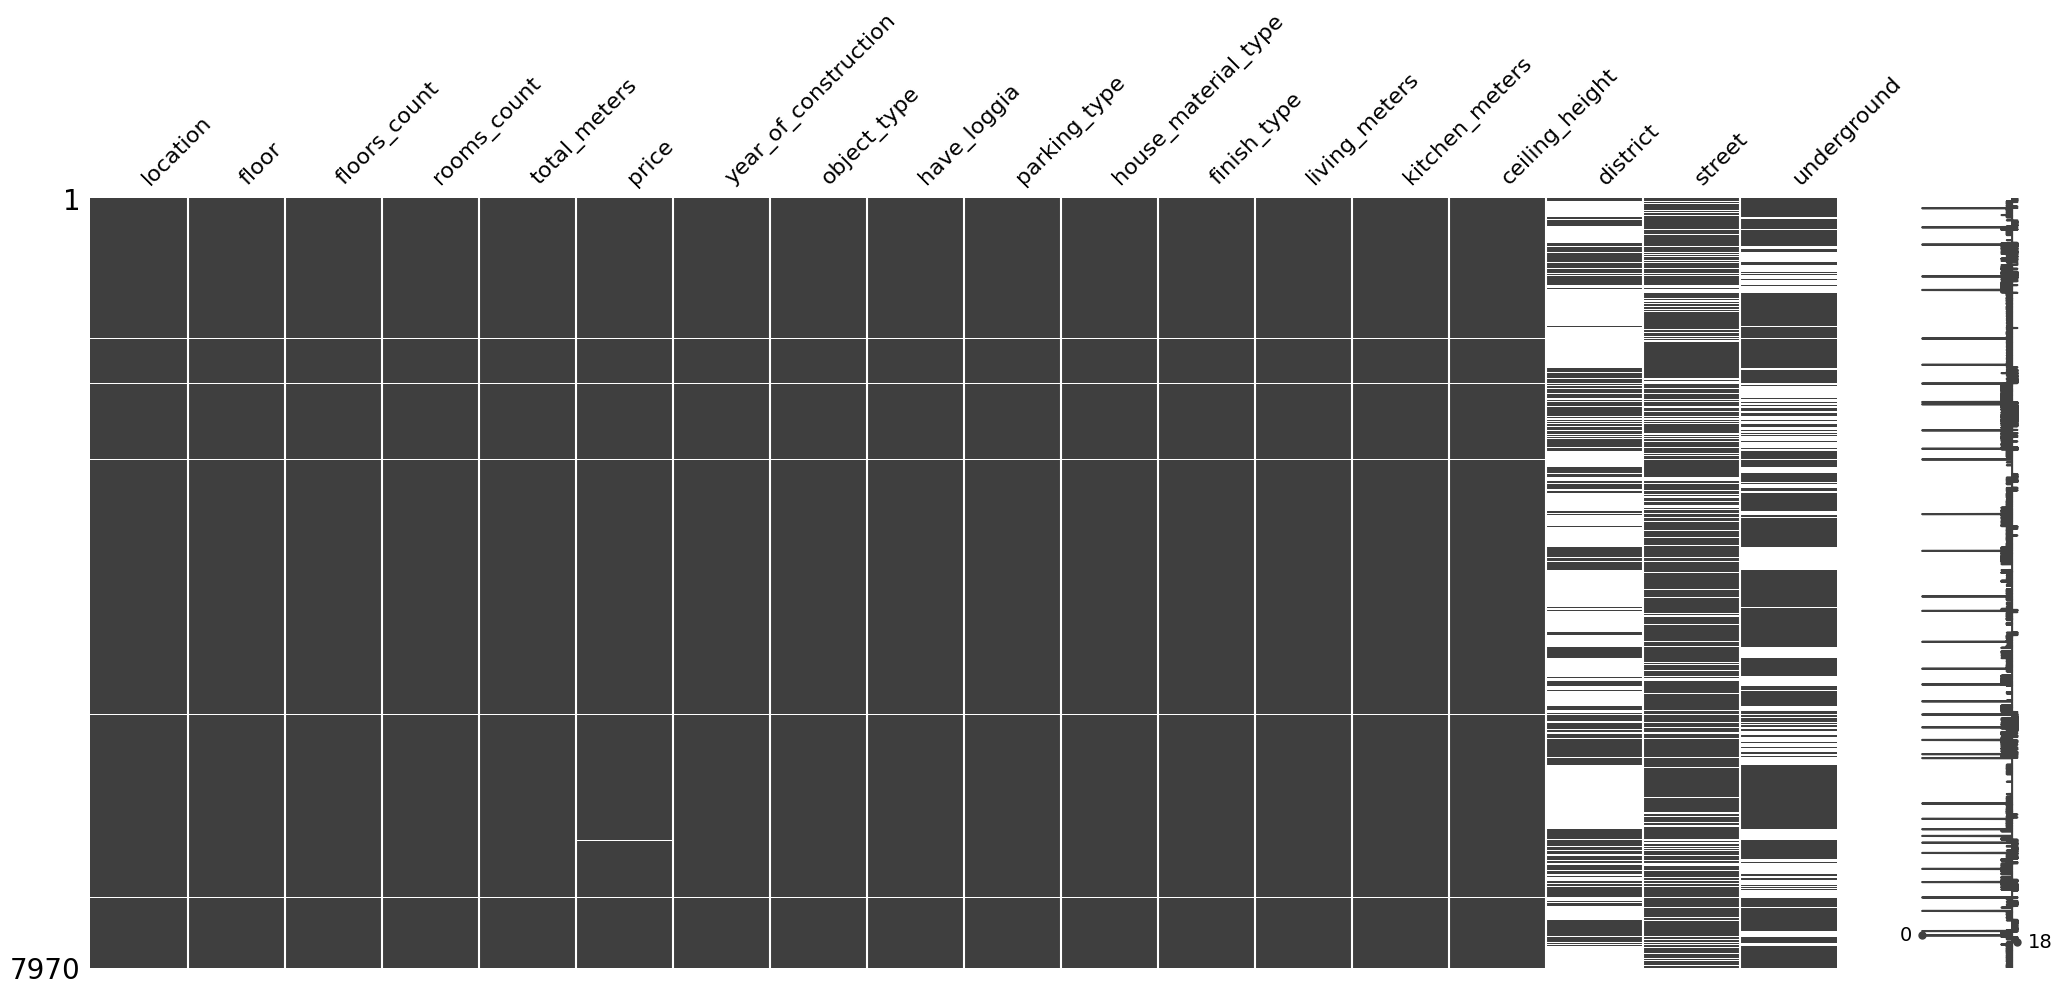

In [1085]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

Убираем пустые строки и повторяющиеся данные.

In [1086]:
df = df.dropna(thresh=4)
df = df.drop_duplicates()
df.shape

(7207, 18)

Выводим число пропусков в каждом столбце в виде числа.

In [1087]:
check_null = df.isnull().sum().reset_index()
print(check_null)

                   index     0
0               location     0
1                  floor     0
2           floors_count     0
3            rooms_count     0
4           total_meters     0
5                  price    13
6   year_of_construction     0
7            object_type     0
8            have_loggia     0
9           parking_type     0
10   house_material_type     0
11           finish_type     0
12         living_meters     0
13        kitchen_meters     0
14        ceiling_height     0
15              district  4346
16                street  1498
17           underground  2203


Изменяем также значение -1 на NaN, то есть на пустоту, так как нам нужны корректные данные.
Также сразу меняем пустоту на ноль в двух колонках, в которых это может быть не указано специально, так как может отсутствовать в принципе

In [1088]:
df.replace('-1', np.nan, inplace=True)
df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')

Удаляем пустые значения в которых не должно быть пропусков. Также выводим процентное количество пропусков в каждом столбце, чтобы проверить чтобы пропусков не было более 70%.

In [1089]:
df = df.dropna(subset=['price'])
df = df.dropna(subset=['total_meters'])
df = df.dropna(subset=['rooms_count'])
null = df.isnull().sum().reset_index()
missing_percentage = df.isnull().mean() * 100
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']
print(missing_percentage_df)

                  Column  Missing Percentage
0               location            0.000000
1                  floor            0.000000
2           floors_count            0.000000
3            rooms_count            0.000000
4           total_meters            0.000000
5                  price            0.000000
6   year_of_construction           17.166596
7            object_type            0.000000
8            have_loggia            0.000000
9           parking_type            0.000000
10   house_material_type           82.030700
11           finish_type           74.820448
12         living_meters           22.236305
13        kitchen_meters           16.406140
14        ceiling_height           35.093649
15              district           60.132376
16                street           20.729475
17           underground           30.770314


Удаляем два столбца из-за больших пропусков, превышающих 70%. Выводим количество пропусков в виде числа.

In [1090]:
df.drop(columns=['house_material_type','finish_type'], inplace=True)
null_counts_cian = df.isnull().sum().reset_index()
print(null_counts_cian)

                   index     0
0               location     0
1                  floor     0
2           floors_count     0
3            rooms_count     0
4           total_meters     0
5                  price     0
6   year_of_construction  1219
7            object_type     0
8            have_loggia     0
9           parking_type     0
10         living_meters  1579
11        kitchen_meters  1165
12        ceiling_height  2492
13              district  4270
14                street  1472
15           underground  2185


Выводим информацию о столбцах.

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 7969
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7101 non-null   object
 1   floor                 7101 non-null   object
 2   floors_count          7101 non-null   object
 3   rooms_count           7101 non-null   object
 4   total_meters          7101 non-null   object
 5   price                 7101 non-null   object
 6   year_of_construction  5882 non-null   object
 7   object_type           7101 non-null   object
 8   have_loggia           7101 non-null   object
 9   parking_type          7101 non-null   object
 10  living_meters         5522 non-null   object
 11  kitchen_meters        5936 non-null   object
 12  ceiling_height        4609 non-null   object
 13  district              2831 non-null   object
 14  street                5629 non-null   object
 15  underground           4916 non-null   objec

Обрабатываем данные, заменяем отсутствующие значения (-1) на NaN, заполняем их средними значениями по соответствующим столбцам и приводим данные к нужным типам. Затем выводим информацию о DataFrame.

In [1092]:
df = df.loc[df['rooms_count'] != 'rooms_count']
df['floor'] = df['floor'].replace({-1: np.nan})
df['floor'] = df['floor'].astype(float)
mean_floor = df['floor'].mean()
df['floor'] = df['floor'].fillna(mean_floor)
df['floor'] = df['floor'].astype('int64')
df['floors_count'] = df['floors_count'].replace({'floors_count': '3', -1: np.nan})
df['floors_count'] = df['floors_count'].astype(float)
mean_floors_count = df['floors_count'].mean()
df['floors_count'] = df['floors_count'].fillna(mean_floors_count)
df['floors_count'] = df['floors_count'].astype('int64')
df['rooms_count'] = df['rooms_count'].replace({'rooms_count': '3', -1: np.nan})
df['rooms_count'] = df['rooms_count'].astype(float)
mean_rooms_count = df['rooms_count'].mean()
df['rooms_count'] = df['rooms_count'].fillna(mean_rooms_count)
df['rooms_count'] = df['rooms_count'].astype('int64')
df['total_meters'] = df['total_meters'].replace({-1: np.nan})
df['total_meters'] = df['total_meters'].astype(float)
mean_total_meters = df['total_meters'].mean()
df['total_meters'] = df['total_meters'].fillna(mean_total_meters)
df['price'] = df['price'].replace({-1: np.nan})
df['price'] = df['price'].astype(float)
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)
df['price'] = df['price'].astype('int64')
df['ceiling_height'] = df['ceiling_height'].str.replace(r'\xa0м', '', regex=True)
df['ceiling_height'] = df['ceiling_height'].str.replace(',', '.')
df['ceiling_height'] = df['ceiling_height'].replace({'-1': np.nan})
df['ceiling_height'] = df['ceiling_height'].astype(float)
mean_ceiling_height = df['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(mean_ceiling_height)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7100 entries, 0 to 7969
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7100 non-null   object 
 1   floor                 7100 non-null   int64  
 2   floors_count          7100 non-null   int64  
 3   rooms_count           7100 non-null   int64  
 4   total_meters          7100 non-null   float64
 5   price                 7100 non-null   int64  
 6   year_of_construction  5881 non-null   object 
 7   object_type           7100 non-null   object 
 8   have_loggia           7100 non-null   object 
 9   parking_type          7100 non-null   object 
 10  living_meters         5521 non-null   object 
 11  kitchen_meters        5935 non-null   object 
 12  ceiling_height        7100 non-null   float64
 13  district              2830 non-null   object 
 14  street                5628 non-null   object 
 15  underground           4915

Выводит статистическую сводку числовых данных

In [1093]:
numerical_description = df.describe()
print(numerical_description)

             floor  floors_count  rooms_count  total_meters         price  \
count  7100.000000   7100.000000  7100.000000   7100.000000  7.100000e+03   
mean      7.410704     13.929577     1.731972     51.669144  1.500228e+07   
std       6.682045      9.152099     0.847005     30.561712  4.766439e+07   
min       1.000000      1.000000     1.000000     13.000000  8.300000e+05   
25%       3.000000      7.000000     1.000000     35.000000  5.400000e+06   
50%       5.000000     13.000000     2.000000     44.500000  7.757476e+06   
75%      10.000000     18.000000     2.000000     60.000000  1.100000e+07   
max      82.000000     97.000000     5.000000    590.300000  2.361200e+09   

       ceiling_height  
count     7100.000000  
mean         2.828529  
std          0.684942  
min          0.000000  
25%          2.700000  
50%          2.828529  
75%          2.828529  
max         52.000000  


Выводит информацию о количестве и проценте пропусков в необходимых столбцах для дальнейшего анализа.

In [1094]:
columns_to_check = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'ceiling_height']
missing_values = df[columns_to_check].isnull().sum()
missing_percent = (df[columns_to_check].isnull().mean() * 100).round(2)
missing_info = pd.DataFrame({'Пропуски (кол-во)': missing_values, 'Пропуски (%)': missing_percent})
print("Информация о пропусках в указанных колонках:")
print(missing_info)

Информация о пропусках в указанных колонках:
                Пропуски (кол-во)  Пропуски (%)
floor                           0           0.0
floors_count                    0           0.0
rooms_count                     0           0.0
total_meters                    0           0.0
price                           0           0.0
ceiling_height                  0           0.0


In [1095]:
columns_to_check = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'ceiling_height']
zero_values = (df[columns_to_check] == 0).sum()
zero_percent = ((df[columns_to_check] == 0).mean() * 100).round(2)
zero_info = pd.DataFrame({'Нули (кол-во)': zero_values, 'Нули (%)': zero_percent})
print("Информация о нулевых значениях в указанных колонках:")
print(zero_info)
df = df[df['ceiling_height'] != 1]

Информация о нулевых значениях в указанных колонках:
                Нули (кол-во)  Нули (%)
floor                       0      0.00
floors_count                0      0.00
rooms_count                 0      0.00
total_meters                0      0.00
price                       0      0.00
ceiling_height              1      0.01


Устанавливаем пределы для удаления маловероятной и недостоверной информации.

In [1096]:
bounds = {
    'floor': (1, 97),
    'floors_count': (1, 95),
    'rooms_count': (1, 6),
    'total_meters': (8, 260), 
    'price': (2000000, 800000000),
    'ceiling_height': (2.0, 6.0),    
}
for column, (lower, upper) in bounds.items():
    df = df[(df[column] >= lower) & (df[column] <= upper)]
numerical_description_cleaned = df.describe()
print(numerical_description_cleaned)

             floor  floors_count  rooms_count  total_meters         price  \
count  7025.000000   7025.000000  7025.000000   7025.000000  7.025000e+03   
mean      7.367402     13.927117     1.727260     50.831001  1.368045e+07   
std       6.345486      8.857907     0.832962     24.932921  3.043203e+07   
min       1.000000      1.000000     1.000000     13.000000  2.000000e+06   
25%       3.000000      7.000000     1.000000     35.100000  5.402863e+06   
50%       5.000000     14.000000     2.000000     44.500000  7.800000e+06   
75%      10.000000     18.000000     2.000000     60.000000  1.100000e+07   
max      75.000000     95.000000     5.000000    250.000000  6.669933e+08   

       ceiling_height  
count     7025.000000  
mean         2.817103  
std          0.224808  
min          2.000000  
25%          2.700000  
50%          2.828529  
75%          2.828529  
max          6.000000  


Выводим только те столбцы, в которых есть пропуски, а также их количество.

In [1097]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Колонки с пропущенными значениями и их количество:")
print(missing_data)

Колонки с пропущенными значениями и их количество:
year_of_construction    1197
living_meters           1549
kitchen_meters          1147
district                4252
street                  1458
underground             2138
dtype: int64


Заполняем пропуски в столбце year_of_construction медианным значением, преобразуя значения в числовой формат.

In [1098]:
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')
median_year = df['year_of_construction'].median()
df['year_of_construction'].fillna(median_year, inplace=True)

C:\Users\josha\AppData\Local\Temp\ipykernel_21196\3779864973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_construction'].fillna(median_year, inplace=True)


Проводим повторную визуализацию оставшихся пропусков в данных, чтобы наглядно показать, как изменилось их количество после предварительной обработки.

<Figure size 1000x600 with 0 Axes>

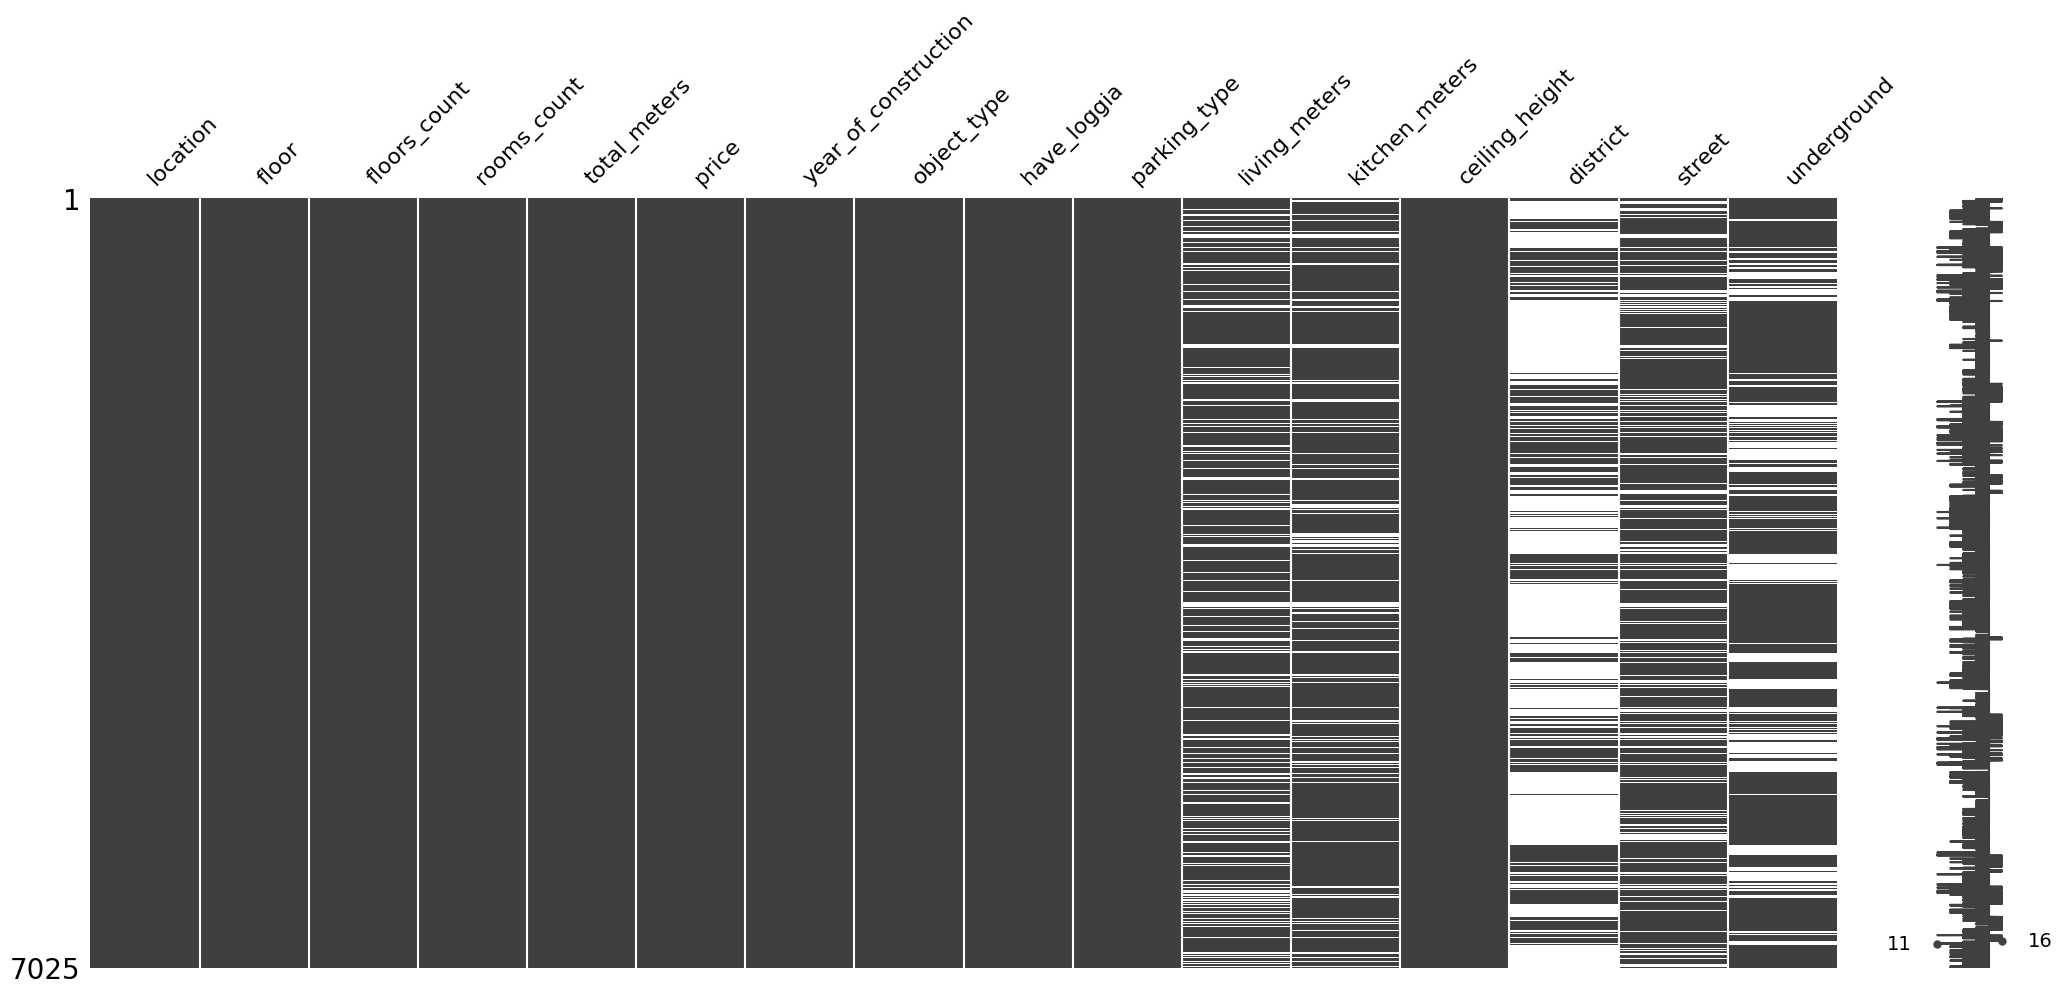

In [1099]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

Объединяем две колонки в одну чтобы заполнить большое количество пропусков, так как трудно или невозможно заполнить их определенными значениями или я не знаю как. Это позволит более эффективно использовать доступные данные и улучшить качество анализа.
Две колонки, которые использовались для заполнения пропусков, удаляются, так как они больше не нужны. Это помогает упростить набор данных и избежать избыточности.

In [1100]:
df['located'] = df['district'].fillna(df['underground'])
df['located'] = df['located'].fillna(df['underground'])
df.drop(columns=['district','underground'], inplace=True)

Выводим процентное количество пропусков в каждом столбце для анализа качества данных. Это позволяет оценить, насколько заполнены данные и выявить, где требуется дополнительная обработка или чистка.

In [1101]:
null = df.isnull().sum().reset_index()
missing_percentage = df.isnull().mean() * 100
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']
print(missing_percentage_df)

                  Column  Missing Percentage
0               location            0.000000
1                  floor            0.000000
2           floors_count            0.000000
3            rooms_count            0.000000
4           total_meters            0.000000
5                  price            0.000000
6   year_of_construction            0.000000
7            object_type            0.000000
8            have_loggia            0.000000
9           parking_type            0.000000
10         living_meters           22.049822
11        kitchen_meters           16.327402
12        ceiling_height            0.000000
13                street           20.754448
14               located            6.348754


Выводим только колонки с пропусками, показывая количество пропусков в каждой из них

In [1102]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Колонки с пропущенными значениями и их количество:")
print(missing_data)

Колонки с пропущенными значениями и их количество:
living_meters     1549
kitchen_meters    1147
street            1458
located            446
dtype: int64


Удаляем пустые значения в колонке, которую заполняли двумя другими, чтобы обеспечить корректность и полноту данных

In [1103]:
df = df.dropna(subset=['located'])

Удаляем колонку street, а затем обрабатываем столбцы kitchen_meters и living_meters, убирая лишние символы и заменяя значения -1 на NaN. После этого заполняем отсутствующие значения в этих колонках медианными значениями и выводим информацию о DataFrame.

In [1104]:
df.drop(columns=['street'], inplace=True)
# df['kitchen_meters'] = df['total_meters'] * 0.3
# df['living_meters'] = df['total_meters'] * 0.7
# print(df[['total_meters', 'kitchen_meters', 'living_meters']].head())
# Заполняем отсутствующие значения медианой для столбца kitchen_meters

df['kitchen_meters'] = df['kitchen_meters'].str.replace(r'\xa0м²', '', regex=True)
df['kitchen_meters'] = df['kitchen_meters'].str.replace(',', '.')
df['kitchen_meters'] = df['kitchen_meters'].replace({'-1': np.nan})
df['kitchen_meters'] = df['kitchen_meters'].astype(float)
df['living_meters'] = df['living_meters'].str.replace(r'\xa0м²', '', regex=True)
df['living_meters'] = df['living_meters'].str.replace(',', '.')
df['living_meters'] = df['living_meters'].replace({'-1': np.nan})
df['living_meters'] = df['living_meters'].astype(float)
mean_kitchen_meters = df['kitchen_meters'].mean()
mean_living_meters = df['living_meters'].mean()
df['kitchen_meters'] = df['kitchen_meters'].fillna(mean_kitchen_meters)
df['living_meters'] = df['living_meters'].fillna(mean_living_meters)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6579 entries, 1 to 7969
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6579 non-null   object 
 1   floor                 6579 non-null   int64  
 2   floors_count          6579 non-null   int64  
 3   rooms_count           6579 non-null   int64  
 4   total_meters          6579 non-null   float64
 5   price                 6579 non-null   int64  
 6   year_of_construction  6579 non-null   float64
 7   object_type           6579 non-null   object 
 8   have_loggia           6579 non-null   object 
 9   parking_type          6579 non-null   object 
 10  living_meters         6579 non-null   float64
 11  kitchen_meters        6579 non-null   float64
 12  ceiling_height        6579 non-null   float64
 13  located               6579 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 771.0+ KB


Отфильтровываем данные, оставляя только записи с годом постройки от 1950 до 2024 года, и выводим количество оставшихся записей после удаления выбросов.

In [1105]:
df = df[(df['year_of_construction'] >= 1950) & (df['year_of_construction'] <= 2024)]
print(f'Количество записей после удаления выбросов: {df.shape[0]}')

Количество записей после удаления выбросов: 5436


Визуализируем количество пропусков в данных, чтобы оценить состояние заполненности столбцов.

<Figure size 1000x600 with 0 Axes>

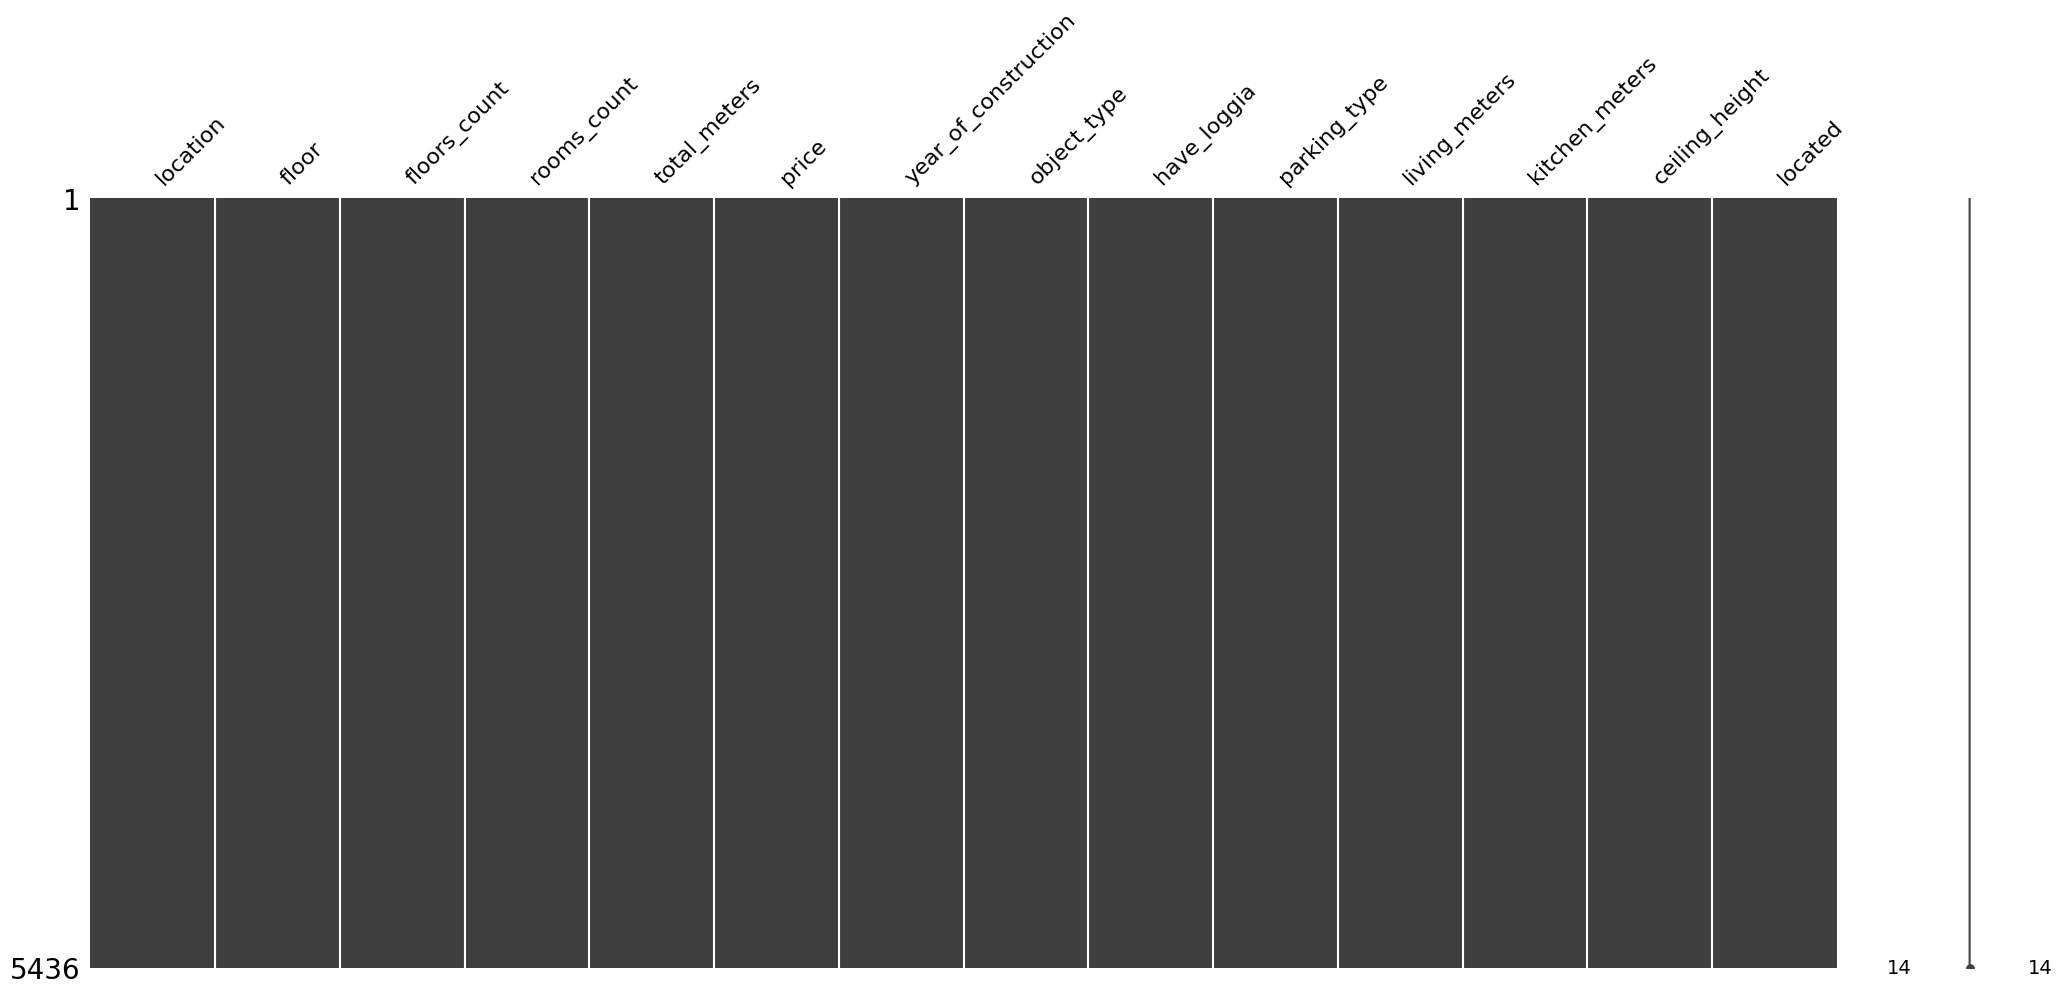

In [1106]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

Закодируем категориальные переменные и изменим названия столбцов на русский. Затем создадим матрицу корреляции для числовых столбцов и визуализируем её с помощью тепловой карты.

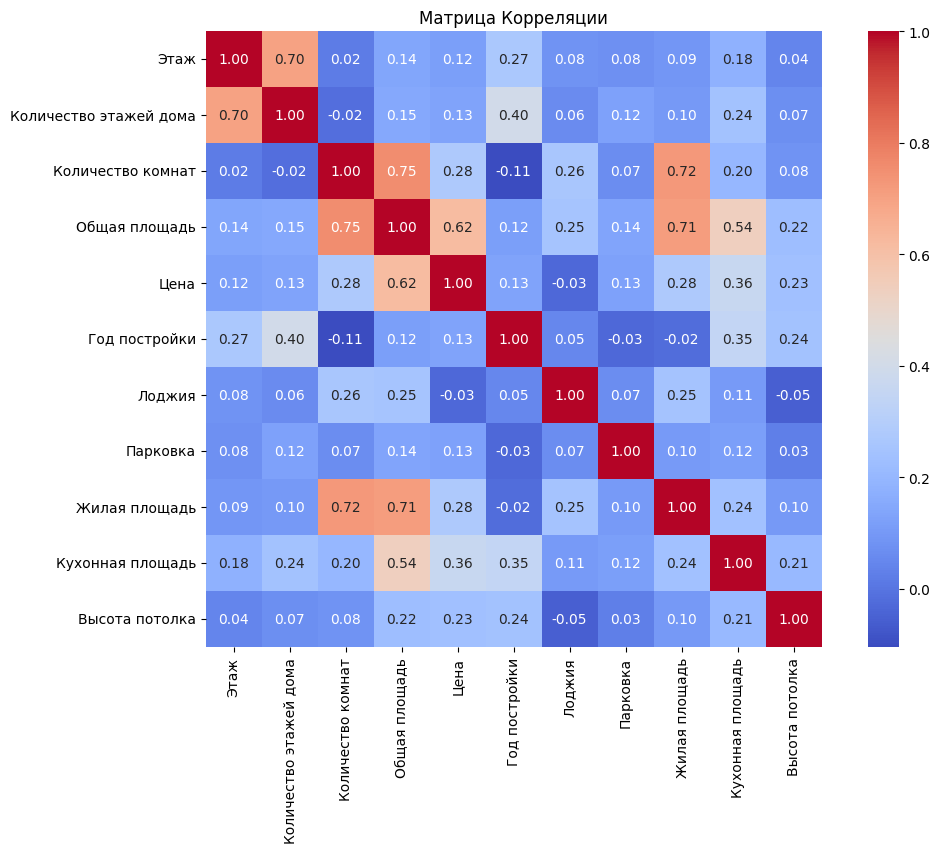

In [1107]:

le_loggia = LabelEncoder()
le_parking = LabelEncoder()
df['have_loggia'] = le_loggia.fit_transform(df['have_loggia'])
df['parking_type'] = le_parking.fit_transform(df['parking_type'])
df_encoded = pd.get_dummies(df, drop_first=True)
column_name_mapping = {
    'floor': 'Этаж',
    'floors_count': 'Количество этажей дома',
    'rooms_count': 'Количество комнат',
    'total_meters': 'Общая площадь',
    'price': 'Цена',
    'ceiling_height': 'Высота потолка',
    'living_meters': 'Жилая площадь',
    'kitchen_meters': 'Кухонная площадь',
    'year_of_construction': 'Год постройки',
    'have_loggia': 'Лоджия',
    'parking_type': 'Парковка'
}
df_encoded = df_encoded.rename(columns=column_name_mapping)
numeric_df = df_encoded.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar=True, xticklabels=numeric_df.columns, yticklabels=numeric_df.columns)
plt.title('Матрица Корреляции')
plt.show()

Отобразим рост цен по годам

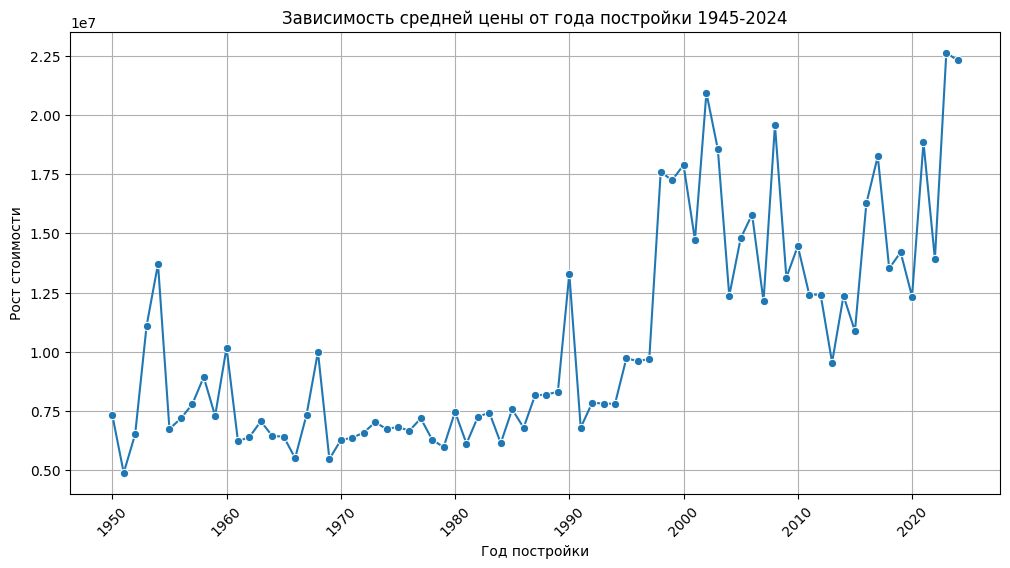

In [1108]:
average_price_per_year = df.groupby('year_of_construction')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='year_of_construction', y='price', marker='o')
plt.title('Зависимость средней цены от года постройки 1945-2024')
plt.xlabel('Год постройки')
plt.ylabel('Рост стоимости')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Отобразим количество данных по количеству комнат.

C:\Users\josha\AppData\Local\Temp\ipykernel_21196\3973909759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rooms_count', palette='viridis')


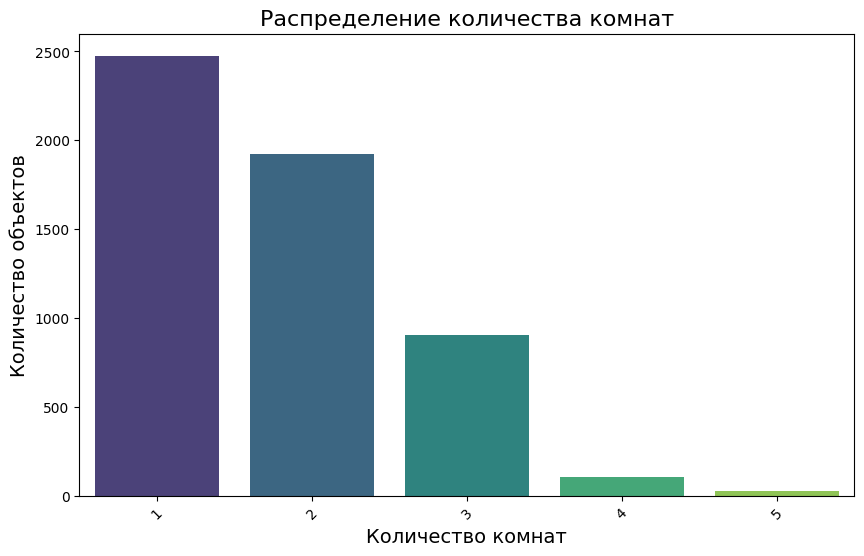

In [1109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rooms_count', palette='viridis')
plt.title('Распределение количества комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Отобразим зависимость количества комнат от площади.

C:\Users\josha\AppData\Local\Temp\ipykernel_21196\3293354940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_area, x='rooms_count', y='total_meters', palette='viridis')


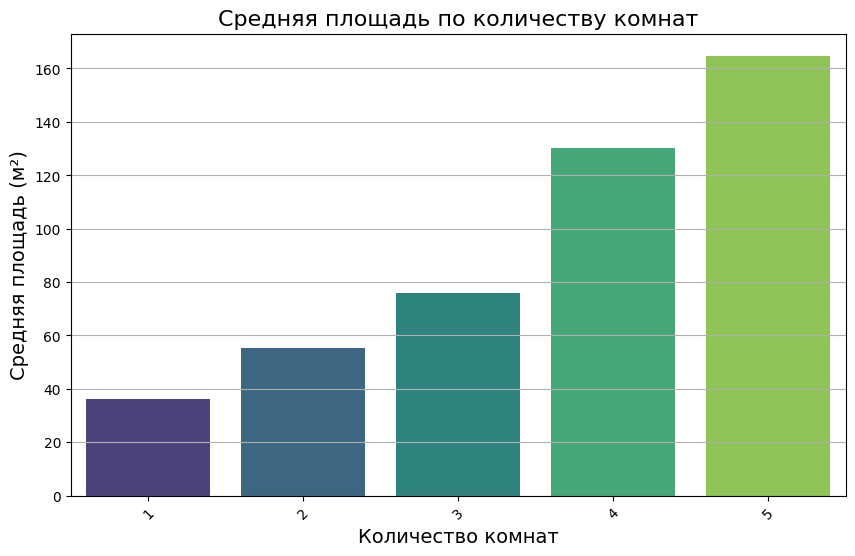

In [1110]:
average_area = df.groupby('rooms_count')['total_meters'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_area, x='rooms_count', y='total_meters', palette='viridis')
plt.title('Средняя площадь по количеству комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Средняя площадь (м²)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Отобразим среднюю цену в разных районах Москвы и Московской области

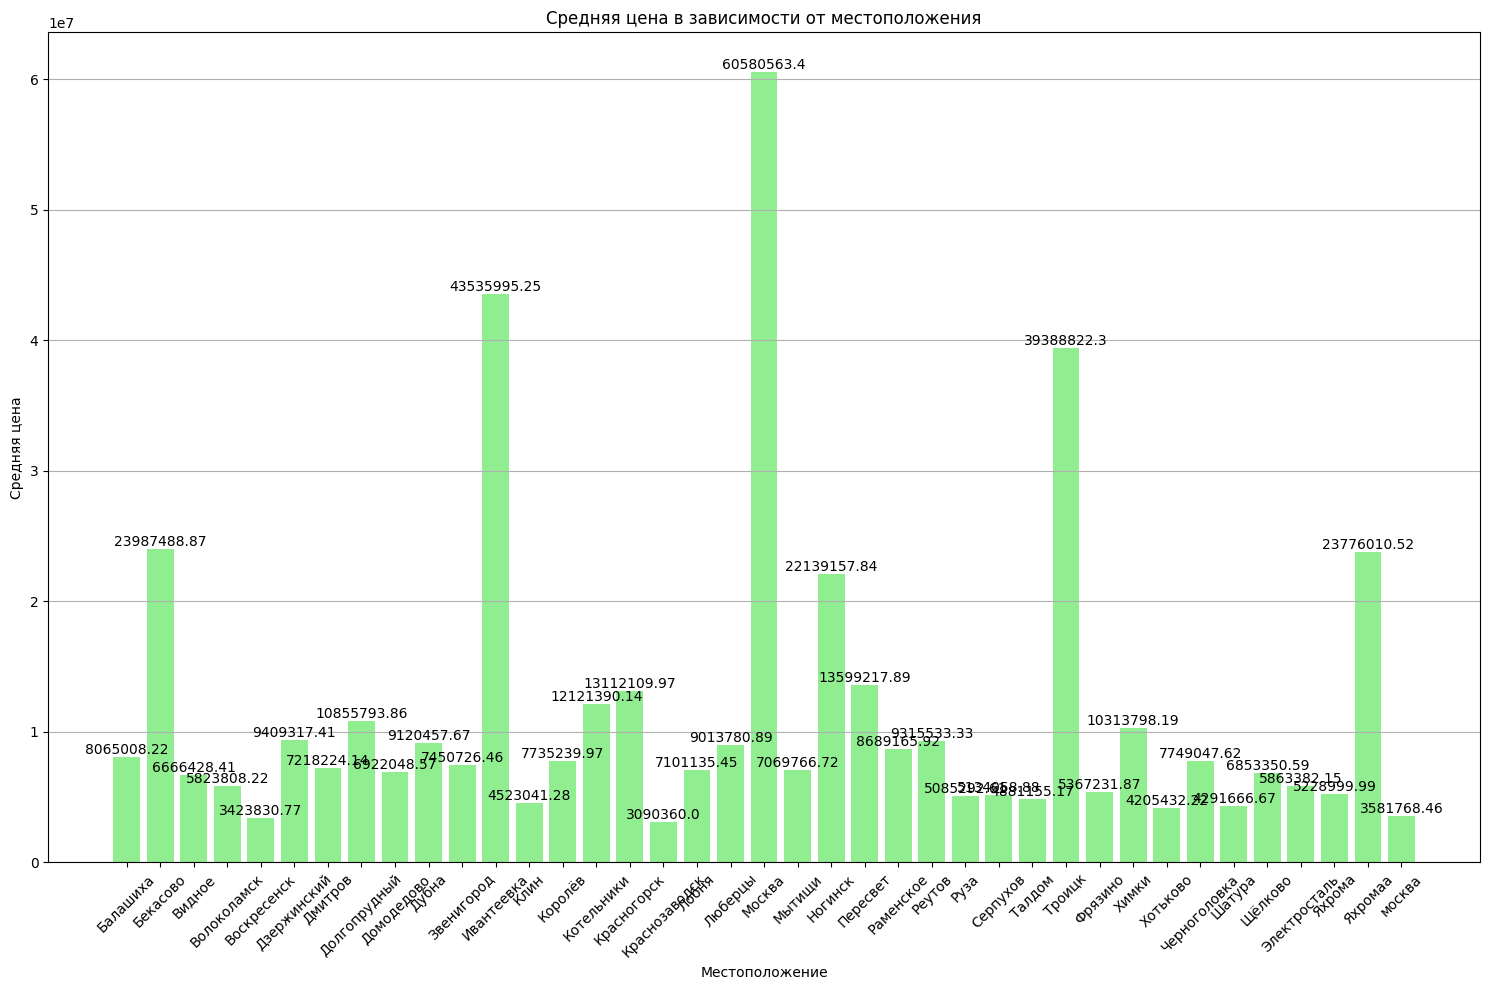

In [1111]:
average_price_by_location = df.groupby('location')['price'].mean().reset_index()
plt.figure(figsize=(15, 10))
bars = plt.bar(average_price_by_location['location'], average_price_by_location['price'], color='lightgreen')
plt.title('Средняя цена в зависимости от местоположения')
plt.xlabel('Местоположение')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Отобразим среднюю стоимость за квадратный метр в разных районах Москвы и Московской области, исключив выбросы. Сначала рассчитываем квартильные значения и интерквартильный размах для цен и общей площади. Затем фильтруем данные, удаляя выбросы, и рассчитываем среднюю цену за квадратный метр для каждого района. В завершение представляем результаты в виде столбчатой диаграммы.

C:\Users\josha\AppData\Local\Temp\ipykernel_21196\1472630491.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_price_per_sqm_by_location = filtered_df.groupby('location').apply(


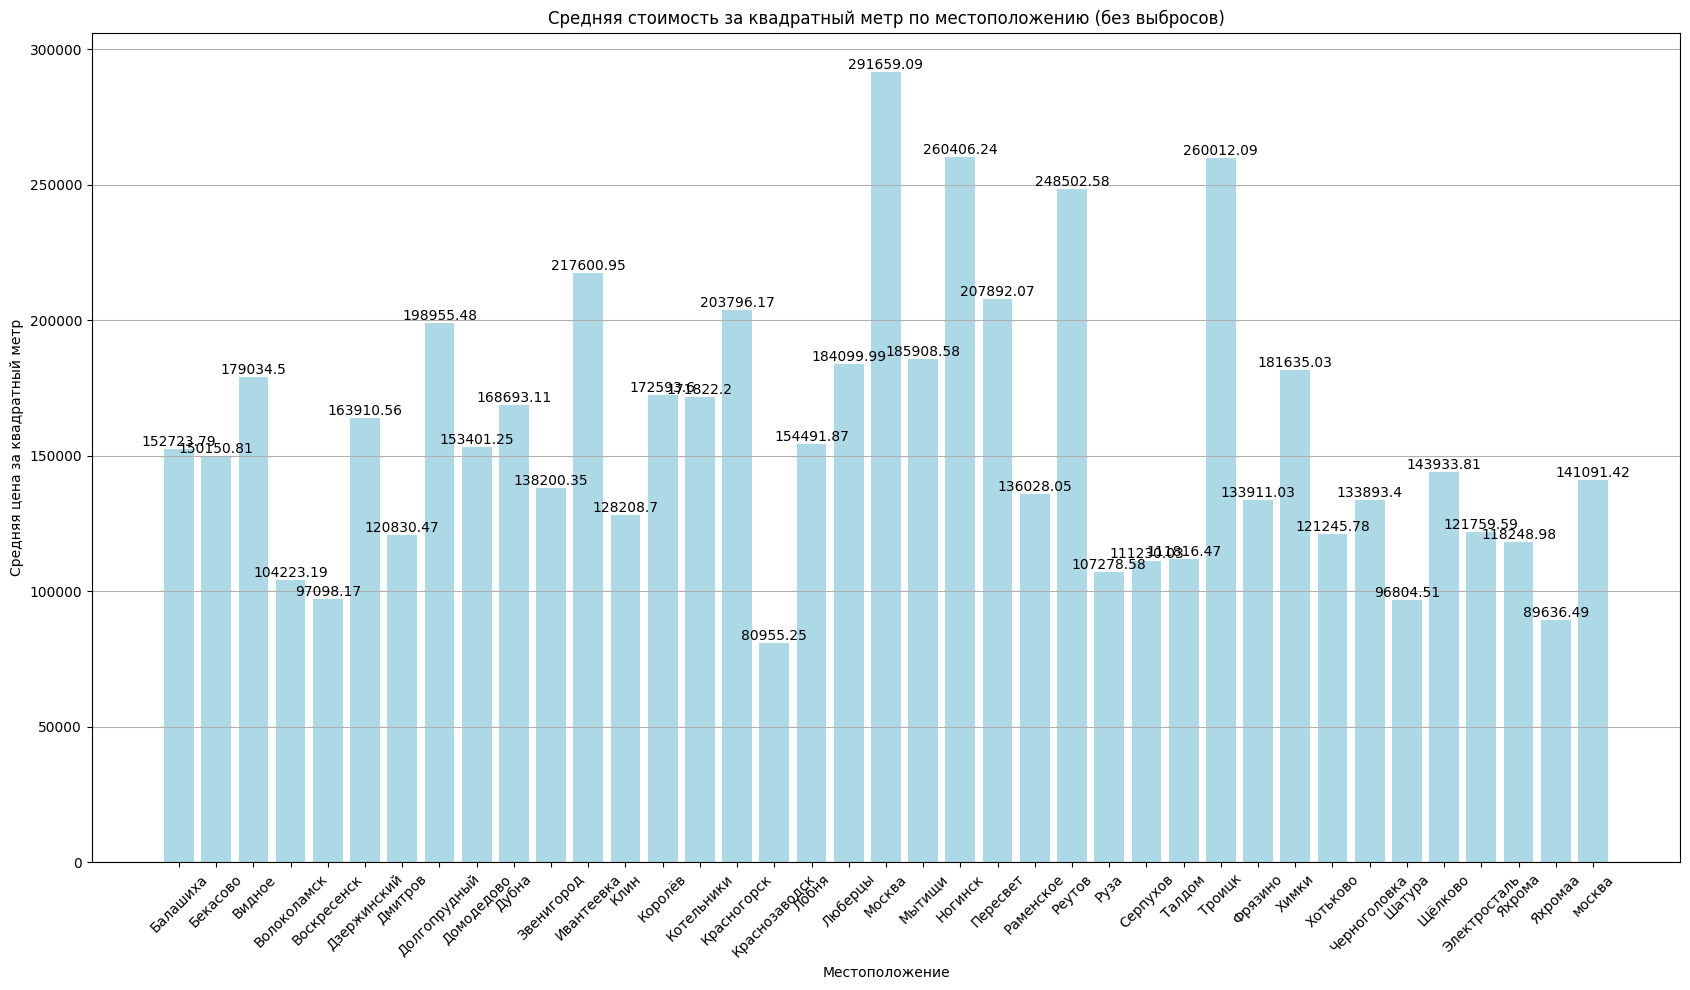

In [1112]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
Q1_total = df['total_meters'].quantile(0.25)
Q3_total = df['total_meters'].quantile(0.75)
IQR_total = Q3_total - Q1_total
lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total
filtered_df = df[
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
    (df['total_meters'] >= lower_bound_total) & (df['total_meters'] <= upper_bound_total)
]
average_price_per_sqm_by_location = filtered_df.groupby('location').apply(
    lambda x: x['price'].sum() / x['total_meters'].sum()
).reset_index(name='average_price_per_sqm')

plt.figure(figsize=(17, 10))
bars = plt.bar(average_price_per_sqm_by_location['location'], average_price_per_sqm_by_location['average_price_per_sqm'], color='lightblue')
plt.title('Средняя стоимость за квадратный метр по местоположению (без выбросов)')
plt.xlabel('Местоположение')
plt.ylabel('Средняя цена за квадратный метр')
plt.xticks(rotation=45)
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Выводим тепловую карту, добавляя значение цены за квадратный метр

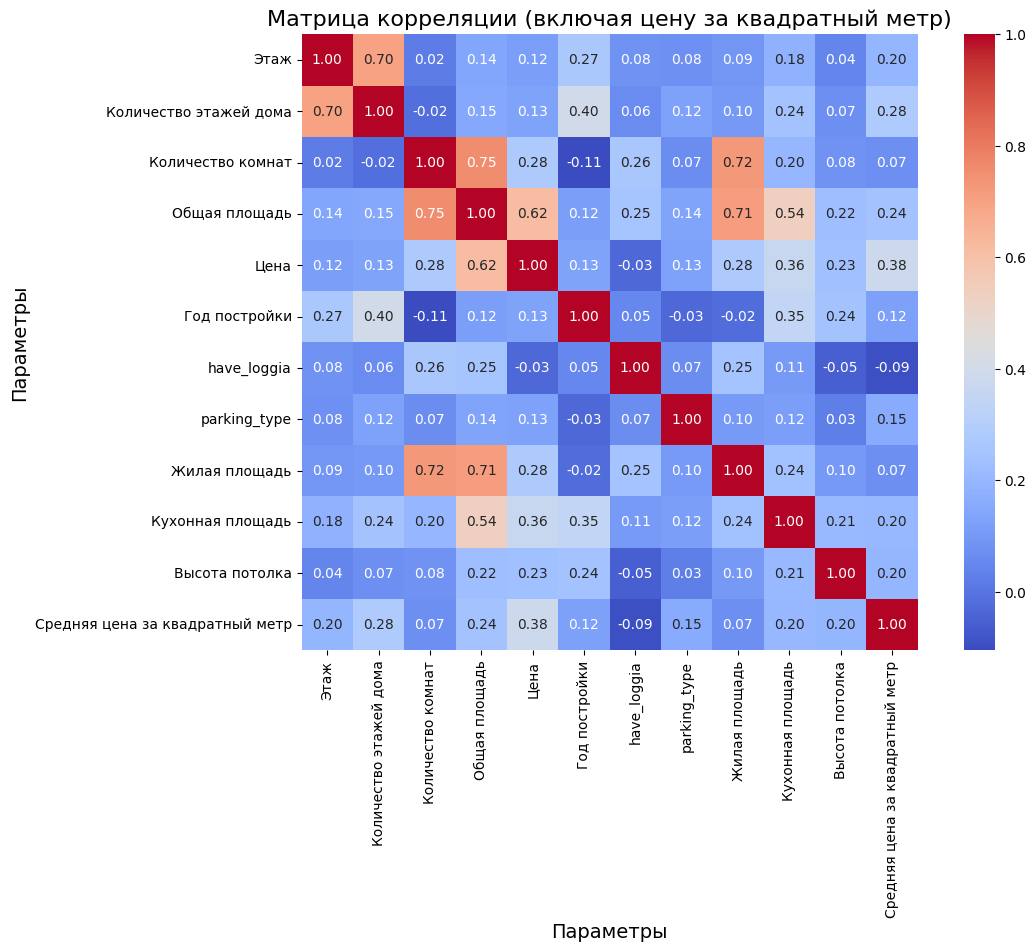

In [1113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_with_price_per_sqm = pd.merge(df, average_price_per_sqm_by_location, on='location', how='left')

# Выбираем только числовые столбцы для вычисления матрицы корреляции
numeric_df = df_with_price_per_sqm.select_dtypes(include=[np.number])

# Переименование столбцов для наглядности
column_name_mapping = {
    'floor': 'Этаж',
    'floors_count': 'Количество этажей дома',
    'rooms_count': 'Количество комнат',
    'total_meters': 'Общая площадь',
    'price': 'Цена',
    'ceiling_height': 'Высота потолка',
    'living_meters': 'Жилая площадь',
    'kitchen_meters': 'Кухонная площадь',
    'year_of_construction': 'Год постройки',
    'average_price_per_sqm': 'Средняя цена за квадратный метр'
}

# Обновляем имена столбцов в numeric_df
numeric_df = numeric_df.rename(columns=column_name_mapping)

# Вычисляем матрицу корреляции
correlation_matrix = numeric_df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar=True, xticklabels=numeric_df.columns, yticklabels=numeric_df.columns)
plt.title('Матрица корреляции (включая цену за квадратный метр)', fontsize=16)
plt.xlabel('Параметры', fontsize=14)
plt.ylabel('Параметры', fontsize=14)
plt.show()



Вывод  мы узнали срдкнюю цену в зависамости от города